In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.gray();
from matplotlib.pyplot import imshow

import skimage
from skimage.io import imread, imsave
from skimage.transform import rotate, resize
from skimage.filters import gaussian
from skimage.transform import AffineTransform, ProjectiveTransform, warp

from ipywidgets import interact, interactive, fixed, RadioButtons
import ipywidgets as widgets
from IPython.display import display

<Figure size 432x288 with 0 Axes>

## 画像変形

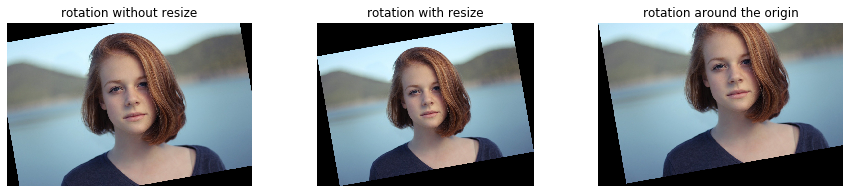

In [14]:
im = imread('girl.jpg')

# @interact(angle=(-180, 180, 10))

def g(angle=0):

    fig = plt.figure(figsize=(15,3))
    
    fig.add_subplot(1, 3, 1)
    im_rot = rotate(im, angle=angle, resize=False)
    imshow(im_rot)
    plt.axis('off')
    plt.title('rotation without resize')

    fig.add_subplot(1, 3, 2)
    im_rot = rotate(im, angle=angle, resize=True)
    imshow(im_rot)
    plt.axis('off')
    plt.title('rotation with resize')


    fig.add_subplot(1, 3, 3)
    angle = np.deg2rad(angle)
    A = np.array([[np.cos(angle), -np.sin(angle), 0],
                  [np.sin(angle), np.cos(angle), 0],
                  [ 0,  0, 1]])
    imshow(warp(im, AffineTransform(A)))
    plt.axis('off')
    plt.title('rotation around the origin')
    

    plt.show()
    
g(10)

## スケーリング，回転，鏡映

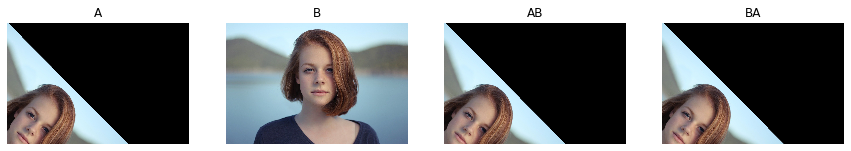

In [17]:
im = imread('girl.jpg')


# @interact(angle=(-180, 180, 10), 
#           tx=(0, im.shape[1], 50),
#           ty=(0, im.shape[0], 50),
#          )
def g(angle=0, tx=0, ty=0):

    angle = np.deg2rad(angle)
    A = np.array([[np.cos(angle), -np.sin(angle), 0],
                  [np.sin(angle), np.cos(angle), 0],
                  [ 0,  0, 1]])
    B = np.array([[ 1,  0, tx],
                  [ 0,  1, ty],
                  [ 0,  0, 1]])

    fig = plt.figure(figsize=(15,3))
    
    fig.add_subplot(1, 4, 1)
    imshow(warp(im, AffineTransform(A).inverse))
    plt.axis('off')
    plt.title('A')


    fig.add_subplot(1, 4, 2)
    imshow(warp(im, AffineTransform(B).inverse))
    plt.axis('off')
    plt.title('B')


    fig.add_subplot(1, 4, 3)
    imshow(warp(im, AffineTransform(A @ B).inverse))
    plt.axis('off')
    plt.title('AB')


    fig.add_subplot(1, 4, 4)
    imshow(warp(im, AffineTransform(B @ A).inverse))
    plt.axis('off')
    plt.title('BA')


    

    plt.show()
    
g(angle=45, tx=2, ty=-2)

## 射影変換

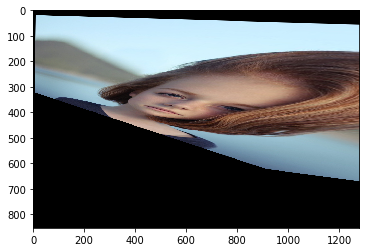

In [18]:
im = imread('girl.jpg')

H = np.array([[1.0, 0.01,  10], 
              [0.01, 1.0,  20], 
              [-0.001, 0.002,  1]])

imshow(warp(im, ProjectiveTransform(H).inverse))
plt.show()

## 順変換と逆変換

### 順変換

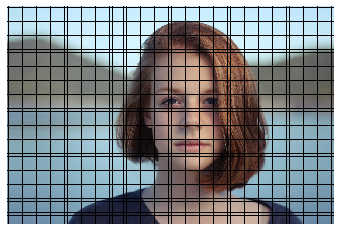

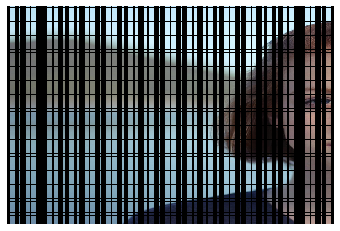

In [23]:
im1 = imread('girl.jpg')

h,w,c = im1.shape
im2 = np.zeros(im1.shape, dtype=np.uint8)

@interact(sx=(0.5, 2.0, 0.1),
          sy=(0.5, 2.0, 0.1))

def g(sx=1.1, sy=1.1):

    im2 = np.zeros(im1.shape, dtype=np.uint8)

    for y in range(h):
        for x in range(w):
            pix_val = im1[y][x]

            xp = sx * x  # x' = s_x x
            yp = sy * y  # y' = s_y y

            xp = int(xp + 0.5)
            yp = int(yp + 0.5)

            if xp >= 0 and xp < w and yp >= 0 and yp < h:
                im2[yp][xp] = pix_val

    imshow(im2)
    plt.axis('off')
    plt.show()
    
g(sx=2.1, sy=1.1)

### 逆変換

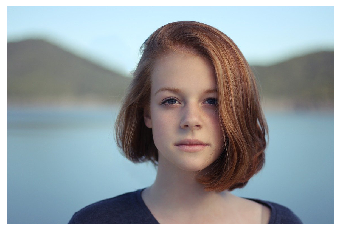

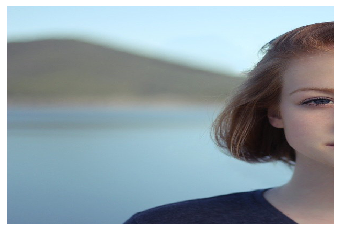

In [25]:

im1 = imread('girl.jpg')

h,w,c = im1.shape

@interact(sx=(0.5, 2.0, 0.1),
          sy=(0.5, 2.0, 0.1))
def g(sx=1.1, sy=1.1):

    im2 = np.zeros(im1.shape, dtype=np.uint8)

    for yp in range(h):
        for xp in range(w):

            x = xp / sx  # x = (1/s_x) x'
            y = yp / sy  # y = (1/s_y) y'

            x = int(x + 0.5)
            y = int(y + 0.5)

            if x >= 0 and x < w and y >= 0 and y < h:
                pix_val = im1[y][x]
                im2[yp][xp] = pix_val

    imshow(im2)
    plt.axis('off')
    plt.show()

g(sx=2.1, sy=1.1)

## 補間手法

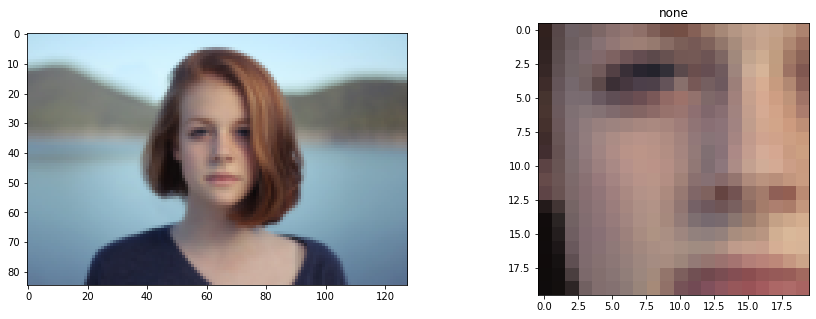

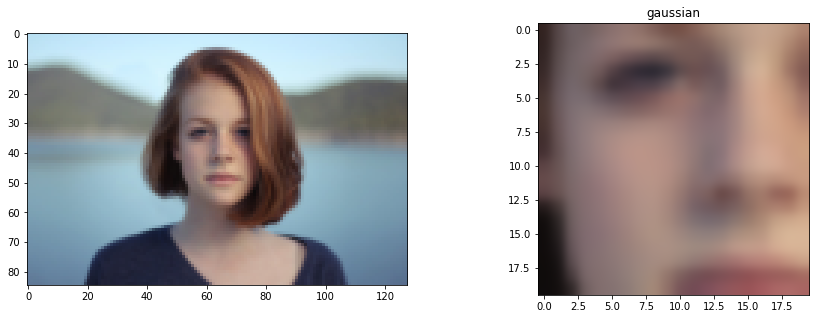

In [31]:
im = imread('girl.jpg')
h, w = im.shape[:2]
im = resize(im, (h//10, w//10))
patch = im[30:50, 50:70]

methods = ['none', 'nearest', 'bilinear', 'bicubic',
           'spline16', 'spline36', 'hanning', 'hamming',
           'hermite', 'kaiser', 'quadric', 'catrom',
           'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

@interact(method=methods)
def g(method=methods[0]):

    fig = plt.figure(figsize=(15,5))

    fig.add_subplot(1, 2, 1)
    imshow(im)

    fig.add_subplot(1, 2, 2)
    imshow(patch, interpolation=method)
    plt.title(method)

    plt.show()
    
g(method=methods[12])